
🔹 Linear Regression Equation:
charges = 393.8730 * bmi + 1192.9372


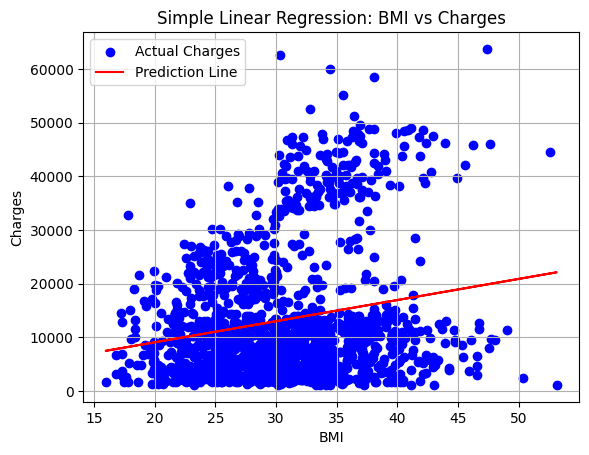

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/sample_data/insurance.csv')  # Change path as needed

# Selecting one independent variable (e.g., bmi) and target (charges)
x = df['bmi'].values
y = df['charges'].values

# Convert to numpy arrays and reshape if needed
x = np.array(x)
y = np.array(y)

# Number of data points
n = len(x)

# Calculate means
mean_x = np.mean(x)
mean_y = np.mean(y)

# Calculate the coefficients
SS_xy = np.sum((x - mean_x) * (y - mean_y))
SS_xx = np.sum((x - mean_x) ** 2)

b1 = SS_xy / SS_xx
b0 = mean_y - b1 * mean_x

# Print regression equation
print(f"\n🔹 Linear Regression Equation:")
print(f"charges = {b1:.4f} * bmi + {b0:.4f}")

# Predict y values using regression line
y_pred = b0 + b1 * x

# Plot actual data points
plt.scatter(x, y, color='blue', label='Actual Charges')
# Plot regression line
plt.plot(x, y_pred, color='red', label=f'Prediction Line')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Simple Linear Regression: BMI vs Charges')
plt.legend()
plt.grid(True)
plt.show()



🔹 Multiple Linear Regression Coefficients:
Intercept: -11938.5386
age: 256.8564
bmi: 339.1935
children: 475.5005
sex_male: -131.3144
smoker_yes: 23848.5345
region_northwest: -352.9639
region_southeast: -1035.0220
region_southwest: -960.0510


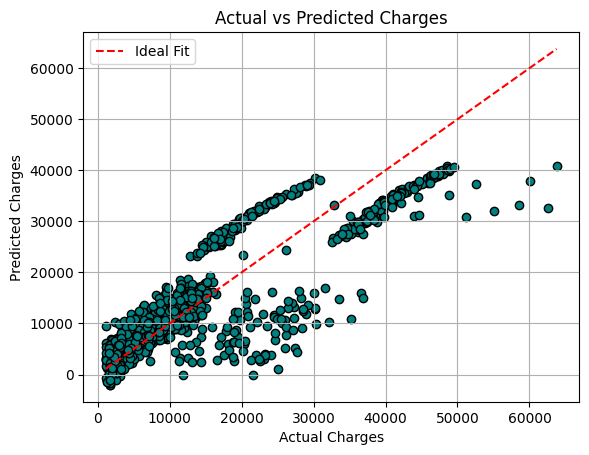

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/sample_data/insurance.csv')

# Encode categorical variables (One-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Convert all values to float (important!)
df_encoded = df_encoded.astype(float)

# Separate independent (X) and dependent (y) variables
X = df_encoded.drop(columns=['charges']).values
y = df_encoded['charges'].values.reshape(-1, 1)

# Add bias term (intercept column)
ones = np.ones((X.shape[0], 1))
X_b = np.hstack((ones, X))

# Apply the Normal Equation using pseudo-inverse to avoid singular matrix error
theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

# Print the learned coefficients
print("\n🔹 Multiple Linear Regression Coefficients:")
feature_names = ['Intercept'] + list(df_encoded.drop(columns=['charges']).columns)
for name, coef in zip(feature_names, theta.flatten()):
    print(f"{name}: {coef:.4f}")

# Predict charges using the model
y_pred = X_b @ theta

# Plot actual vs predicted charges
plt.scatter(y, y_pred, color='teal', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()
